# Case Study #02 on Measures of Central Tendency and Dispersion

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data set to the python environment

In [2]:
Edu = pd.read_csv(r'Desktop\ICTK\Case Study #02 - Measures of Central Tendency and Dispersion\StudentsPerformance.csv')
Edu

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


##  Qn.1 Find out how many males and females participated in the test?

In [3]:
Edu['gender'].unique()

array(['female', 'male'], dtype=object)

In [4]:
gender=Edu.groupby('gender').size()
print('Male and female participants in the dataset are:')
gender

Male and female participants in the dataset are:


gender
female    518
male      482
dtype: int64

## Qn.2 What do you think about the students' parental level of education?

In [5]:
parent_edu=Edu.groupby('parental level of education').size()
print('Parental Level of Education are:')
parent_edu

Parental Level of Education are:


parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64

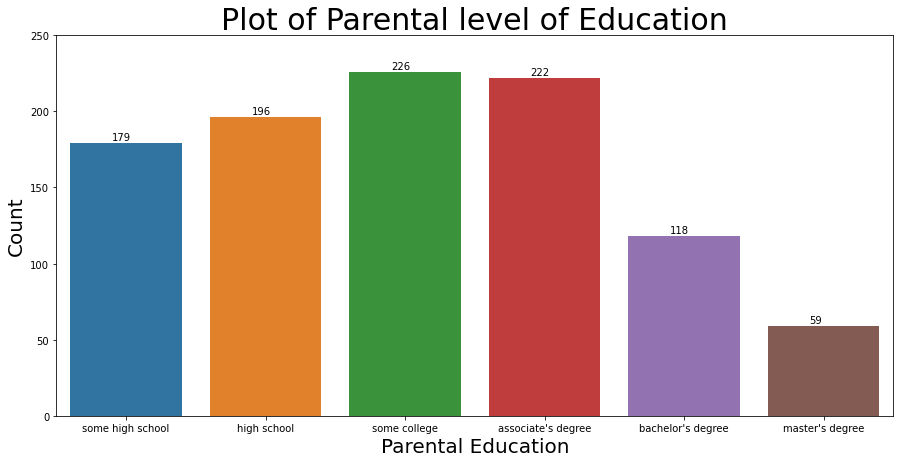

In [6]:
plt.figure(figsize=(15,7))
plt.ylim(0,250)

graph=sns.countplot(x='parental level of education',data=Edu)
plt.title('Plot of Parental level of Education',size=30)
plt.xlabel("Parental Education",fontsize=20)
plt.ylabel("Count",fontsize=20)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+2))


### Insights for Qn. # 2
1) 5.9 % of parents only hold master's degree

2) Total degree holder parents (bachelor's + master's) are less than 20 %

3) Only 40% of parents are degree holders

##  Qn.3 Who scores the most on average for math, reading and writing based on,
### ● Gender;
### ● Test preparation course;

In [7]:
df_gen_mean=Edu.groupby('gender',as_index=False)[["math score","reading score","writing score"]].mean()
print('Mean score values on Gender are:\n')
df_gen_mean

Mean score values on Gender are:



,gender,math score,reading score,writing score
0,female,63.376448,72.590734,72.467181
1,male,68.821577,65.545643,63.446058


In [8]:
df_course_mean=Edu.groupby('test preparation course',as_index=False)[["math score","reading score","writing score"]].mean()
print('Mean score values on test preparation are:\n')
df_course_mean

Mean score values on test preparation are:



,test preparation course,math score,reading score,writing score
0,completed,69.96648,74.175978,74.684358
1,none,63.78972,66.417445,64.457944


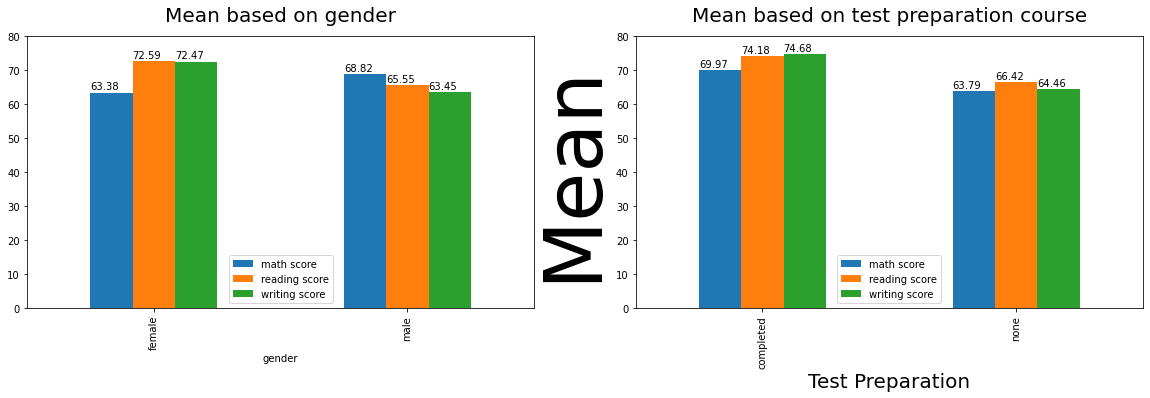

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_ylim(0, 80)
ax[1].set_ylim(0, 80)
plt.ylabel("Mean",fontsize=80)

graph=df_gen_mean[["gender","math score","reading score","writing score"]].plot(x="gender", kind="bar",ax=ax[0])
graph.set_title('Mean based on gender',fontsize=20,pad=15)
plt.xlabel("Gender",fontsize=20)

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+1))
        
graph=df_course_mean[["test preparation course","math score","reading score","writing score"]].plot(x="test preparation course", kind="bar",ax=ax[1])
graph.set_title('Mean based on test preparation course',fontsize=20,pad=15)
plt.xlabel("Test Preparation",fontsize=20)

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+1))

### Insights for Qn. # 3
1. Male students have secured a higher average of 68.82 scores in maths against 63.38 for female students
2. Female students scored a higher percentage of average marks both in reading and writing than males students
3. Students who have completed test preparation courses have outperformed those who have not completed them, in all of the three parameters

##  Qn.4 What do you think about the scoring variation for math, reading and writing based on,
       
### ● Gender?
### ● Test preparation course?

In [10]:
df_gen_std=Edu.groupby('gender',as_index=False)[["math score","reading score","writing score"]].std()
print('Variation in scores of Male and Female students are;\n')
df_gen_std

Variation in scores of Male and Female students are;



,gender,math score,reading score,writing score
0,female,16.029928,14.411018,14.844842
1,male,14.556411,14.149594,14.227225


In [11]:
df_course_std=Edu.groupby('test preparation course',as_index=False)[["math score","reading score","writing score"]].std()
print('Variation in scores as per test preparation are;\n')
df_course_std

Variation in scores as per test preparation are;



,test preparation course,math score,reading score,writing score
0,completed,14.521847,13.537572,13.236412
1,none,15.705689,14.608896,15.041667


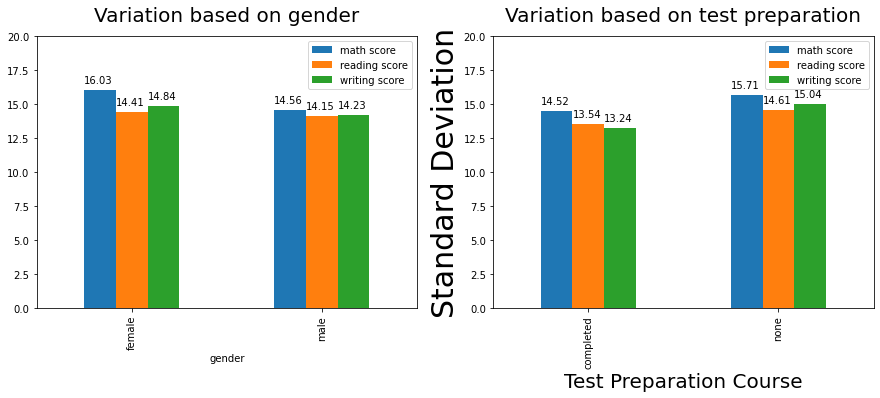

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].set_ylim(0, 20)
ax[1].set_ylim(0, 20)
plt.ylabel("Standard Deviation",fontsize=30)

graph=df_gen_std[["gender","math score","reading score","writing score"]].plot(x="gender", kind="bar",ax=ax[0])
graph.set_title('Variation based on gender',fontsize=20,pad=15)
plt.xlabel("Gender",fontsize=20)

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+.5))
        
graph=df_course_std[["test preparation course","math score","reading score","writing score"]].plot(x="test preparation course", kind="bar",ax=ax[1])
graph.set_title('Variation based on test preparation',fontsize=20,pad=15)
plt.xlabel("Test Preparation Course",fontsize=20)
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+.5))

### Insights for Qn. # 4
1) Male students are more consistent than female students in all the 3 parameters with less variation

2) Female students’ variation is highest for math score

3) Students who have completed test preparation courses have less variation in their scores than those who have not completed


#  Qn.5 The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this? 

In [13]:
Edu.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [14]:
top_250_math = Edu.sort_values(['math score'],ascending=(False))
top_250_math[top_250_math["math score"]>=77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
421,female,group C,some college,free/reduced,none,77,90,91


In [15]:
df_top_250 = Edu.sort_values(['math score', 'reading score','writing score'], ascending=(False))
top_250=df_top_250.head(250)
pd.set_option('display.max_rows',250)
top_250

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
999,male,group E,bachelor's degree,standard,completed,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
997,male,group D,some college,standard,completed,100,97,99
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
513,female,group E,bachelor's degree,standard,completed,99,100,100
514,female,group E,high school,standard,none,99,93,90
995,male,group E,some college,standard,completed,99,87,81


In [16]:
top_250['test preparation course'].value_counts()

none         132
completed    118
Name: test preparation course, dtype: int64

### Qn.#5 References for arriving top 25% for bonus points

1)	The top 25% of students eligible for bonus points should be 250 out of the total 1000 students

2)	1st criterion for the selection of the top 25% is based on math scores

3)	3rd quartile or top 25% of math scores is 77 & students scored >=77 is 255

4)	Since 5 students are more than the required management guideline, we have taken 2nd criteria of reading scores & writing 
    scores to arrive at the top 250 no. of students for bonus points
    
### Qn.#5 Insights

1)  2 out of 3 students who scored 100% on all the 3 parameters and have not completed the test preparation course

2)  132 out of 250 top students i.e., 53% of students have not completed their test preparation course